<a href="https://colab.research.google.com/github/pacayton/Stat_268_Advanced_Time_Series_Analysis/blob/main/Stat_268_Week_5_Multivariate_Time_Series_Analysis_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stat 268: Advanced Time Series Analysis
$$\quad$$
#### Assoc Prof Peter Julian Cayton, PhD
#### School of Statistics
#### University of the Philippines Diliman
#### [Google Scholar](https://scholar.google.com/citations?user=KtH_mGEAAAAJ)

In [ ]:
## Preamble: Please install the following packages before running the codes

install.packages("TSA") ## TSAAR's package for data and functions
install.packages("MTS") ## MTS package for data and functions
install.packages('SimDesign') ## Necessary for Multivariate Simulation
install.packages("dse", repos="http://R-Forge.R-project.org") ## Old dse1 package used in AICTSR
install.packages("EvalEst", repos="http://R-Forge.R-project.org") ## Additional Support package for dse
install.packages("vars") ## Vector Autogression Package used in AICTSR
install.packages("fpp2") ## FPP2's package for data and functions
install.packages("tidyverse") ## for better data management

library(TSA)
library(MTS)
library(SimDesign)
library(dse)
library(EvalEst)
library(vars)
library(fpp2)
library(tidyverse)

# Multivariate Time Series Analysis
* A branch of multivariate statistical analysis that deals with time series data. (MTSA)
* The objectives of multivariate time series analysis includes (MTSA):

> 1. to study the dynamic relationships between variables
> 2. to improve accuracy of forecasting or prediction





## Some Basic Concepts in Multivariate Time Series

#### Random Vector

for time $t=1,2,...,T$,

$$
\mathbf{z}_t =
  \begin{bmatrix}
  z_{1t} \\
  z_{2t} \\
  \vdots \\
  z_{kt}
  \end{bmatrix}
$$

where $k$ is the number of random variables in the vector. We will also use this when referring to a vector of variables to analyze in the data.

#### Expected Value

The expected value, or *mean vector*, of a random vector $\mathbf{z}_t$ is denoted by:

$$\mathbf{\mu}_t = E[\mathbf{z}_t] =    
\begin{bmatrix}
  E(z_{1t}) \\
  E(z_{2t}) \\
  \vdots \\
  E(z_{kt})
  \end{bmatrix}
$$

If all variables are weakly-stationary, which is equivalent to saying the vector is weakly-stationary, then the individual means are constant, then we write $\mathbf{\mu}_t = \mathbf{\mu}$.

A property of the expected value: for $\mathbf{z}_t$ as a random vector with mean $\mathbf{\mu}_t$ with constant matrix $\mathbf{A}$ and constant vector $\mathbf{b}$,

$$ E[\mathbf{A}\mathbf{z}_t + \mathbf{b}] = \mathbf{A}\mathbf{\mu}_t + \mathbf{b} $$

#### Variance-Covariance & Correlation Matrices

The variance-covariance matrix, or *covariance matrix* for short, of a random vector $\mathbf{z}_t$ is

\begin{align*}
\mathbf{\Sigma}_t & = Cov[\mathbf{z}_t] = E [(\mathbf{z}_{t} - \mathbf{\mu}_{t})(\mathbf{z}_{t} - \mathbf{\mu}_{t})'] \\
& =    
\begin{bmatrix}
  E[(z_{1t} - \mu_{1t})^2] & E[(z_{1t} - \mu_{1t})(z_{2t} - \mu_{2t})] & \cdots & E[(z_{1t} - \mu_{1t})(z_{kt} - \mu_{kt})]  \\
  E[(z_{2t} - \mu_{2t})(z_{1t} - \mu_{1t})] & E[(z_{2t} - \mu_{2t})^2] & \cdots & E[(z_{2t} - \mu_{2t})(z_{kt} - \mu_{kt})]  \\
  \vdots & \vdots & \ddots & \vdots \\
  E[(z_{kt} - \mu_{kt})(z_{1t} - \mu_{1t})] & E[(z_{kt} - \mu_{kt})(z_{2t} - \mu_{2t})] & \cdots & E[(z_{kt} - \mu_{kt})^2]
  \end{bmatrix} \\
& = \begin{bmatrix}
  \sigma^2_{1,t} & \sigma_{12,t} & \cdots & \sigma_{1k,t}  \\
  \sigma_{21,t} &  \sigma^2_{2,t} & \cdots & \sigma_{2k,t}  \\
  \vdots & \vdots & \ddots & \vdots \\
  \sigma_{k1,t} & \sigma_{k2,t} & \cdots & \sigma^2_{k,t}
  \end{bmatrix}
\end{align*}

Comments:

* For stationary vectors, it is also assumed that the covariance matrix is constant: $\mathbf{\Sigma}_t = \mathbf{\Sigma} $.

* A property of the covariance matrix: for $\mathbf{z}_t$ as a random vector with a covariance matrix $\mathbf{\Sigma}_t$ with constant matrix $\mathbf{A}$ and constant vector $\mathbf{b}$,

$$ Cov[\mathbf{A}\mathbf{z}_t + \mathbf{b}] = \mathbf{A}\mathbf{\Sigma}_t \mathbf{A}' $$

* Also, the covariance matrix is symmetric: $\mathbf{\Sigma}_t = \mathbf{\Sigma}'_t$

* Covariance matrices should be positive-definite.

For a random vector $\mathbf{z}_t$, let the $\mathbf{V}_t$ be a diagonal matrix with the diagonal elements of $\mathbf{\Sigma}_t$ which contains the variance of the individual variables of the vector. Then, the *correlation matrix* is defined as:

$$\mathbf{R}_t = Cov[\mathbf{V}_t^{-1/2}\mathbf{z}_t] = \mathbf{V}_t^{-1/2} \mathbf{\Sigma}_t \mathbf{V}_t^{-1/2}
= \begin{bmatrix}
  1 & \rho_{12,t} & \cdots & \rho_{1k,t}  \\
  \rho_{21,t} &  1 & \cdots & \rho_{2k,t}  \\
  \vdots & \vdots & \ddots & \vdots \\
  \rho_{k1,t} & \rho_{k2,t} & \cdots & 1
  \end{bmatrix}
$$

Comments:

* The correlation matrix is also symmetric: $\mathbf{R}_t = \mathbf{R}'_t$

* Correlations are also positive-definite.

#### Cross-Covariance and Cross-Correlation Matrices

For a random vector $\mathbf{z}_t$, the cross covariance matrix is defined as:

\begin{align*}
\mathbf{\Gamma}_{t, l} & = Cov[\mathbf{z}_t, \mathbf{z}_{t-l}] = E [(\mathbf{z}_{t} - \mathbf{\mu}_{t})(\mathbf{z}_{t-l} - \mathbf{\mu}_{t-1})'] \\
& =    
\begin{bmatrix}
  E[(z_{1t} - \mu_{1t})(z_{1,t-l} - \mu_{1,t-1})] & E[(z_{1t} - \mu_{1t})(z_{2,t-l} - \mu_{2,t-1})] & \cdots & E[(z_{1t} - \mu_{1t})(z_{k,t-1} - \mu_{k,t-1})]  \\
  E[(z_{2t} - \mu_{2t})(z_{1,t-1} - \mu_{1,t-1})] & E[(z_{2t} - \mu_{2t})(z_{2,t-1} - \mu_{2,t-1})] & \cdots & E[(z_{2t} - \mu_{2t})(z_{k,t-1} - \mu_{k,t-1})]  \\
  \vdots & \vdots & \ddots & \vdots \\
  E[(z_{kt} - \mu_{kt})(z_{1,t-1} - \mu_{1,t-1})] & E[(z_{kt} - \mu_{kt})(z_{2,t-1} - \mu_{2,t-1})] & \cdots &  E[(z_{kt} - \mu_{kt})(z_{k,t-1} - \mu_{k,t-1})]
  \end{bmatrix} \\
& = \begin{bmatrix}
  \gamma_{1,t,l} & \gamma_{12,t,l} & \cdots & \gamma_{1k,t,l}  \\
  \gamma_{21,t,l} &  \gamma_{2,t,l} & \cdots & \gamma_{2k,t,l}  \\
  \vdots & \vdots & \ddots & \vdots \\
  \gamma_{k1,t,l} &  \gamma_{k2,t,l} & \cdots & \gamma_{k,t,l}  \\
  \end{bmatrix}
\end{align*}

and the cross correlation matrix $\mathbf{\rho}_{t,l}$ is defined as

$$\mathbf{\rho}_{t,l} = \mathbf{V}_t^{-1/2} \mathbf{\Gamma}_{t,l} \mathbf{V}_t^{-1/2}
= \begin{bmatrix}
  \rho_{1,t,l} & \rho_{12,t,l} & \cdots & \rho_{1k,t,l}  \\
  \rho_{21,t, l} &  \rho_{2,t,l} & \cdots & \rho_{2k,t,l}  \\
  \vdots & \vdots & \ddots & \vdots \\
  \rho_{k1,t,l} & \rho_{k2,t,l} & \cdots & \rho_{k,t,l}
  \end{bmatrix}
$$

Comments:

* For stationary vector time series, the cross-covariance and cross-correlation matrices only depend on the lag $l$:

$$\mathbf{\Gamma}_{t,l} = \mathbf{\Gamma}_{l}$$
$$\mathbf{\rho}_{t,l} = \mathbf{\rho}_{l}$$

* A property of cross-covariance and cross-correlation matrix in stationary vectors:

$$\mathbf{\Gamma}_{l} = \mathbf{\Gamma}'_{-l}$$
$$\mathbf{\rho}_{l} = \mathbf{\rho}'_{-l}$$

### A Stationary Linear Time Series Model

#### Weakly Stationary Time Series

As we have described earlier, a weakly stationary has the following properties:

1.  a constant mean vector through time: $\mathbf{\mu}_t = \mathbf{\mu}$,

2. a constant covariance matrix: $\mathbf{\Sigma}_t = \mathbf{\Sigma} $, and

3. a cross-covariance matrix that only depends on the lag or time difference $l$: $\mathbf{\Gamma}_{t,l} = \mathbf{\Gamma}_{l}$

#### A White Noise Analogue in Vector Time Series

For our purposes, we define

$$\mathbf{a}_t = [\mathbf{a}_{1t}, ..., \mathbf{a}_{kt}]' \sim iid (\mathbf{\mu} = \mathbf{0}, \mathbf{\Sigma}_a)$$

with $\mathbf{\Sigma}_a$ as positive-definite. This specification may act as our vector process similar to the white noise in univariate time series.

There are also other specifications where would use a process with zero mean vector and diagonal covariance matrix. This is done by Cholesky decomposition of $\mathbf{\Sigma}_a$ with the following form:

$$\mathbf{\Sigma}_a = \mathbf{L}  \mathbf{G}_a \mathbf{L}' $$

where $\mathbf{G}_a$ is diagonal matrix and $\mathbf{L}$ is a lower triangular matrix with diagonal elements being $1$. what happens is that

$$\mathbf{b}_t = [\mathbf{b}_{1t}, ..., \mathbf{b}_{kt}]' \sim iid (\mathbf{\mu} = \mathbf{0}, \mathbf{G}_a)$$
$$ \mathbf{a}_t =  \mathbf{L} \mathbf{b}_t \sim iid (\mathbf{\mu} = \mathbf{0},  \mathbf{L}  \mathbf{G}_a \mathbf{L}' = \mathbf{\Sigma}_a)$$

The feature of $\mathbf{b}_t $ is that its elements are all uncorrelated among each other which may be easier to generate as compared to using a fully defined covariance matrix as $\mathbf{a}_t$ would require.

#### The Stationary Linear Model

A manner to generate a stationary vector time series $\mathbf{z}_t $ from $\mathbf{a}_t \sim iid (\mathbf{0}, \mathbf{\Sigma}_a)$ is using the model

$$\mathbf{z}_t = \mathbf{\mu} + \sum_{i =0}^{\infty} \mathbf{\psi}_i \mathbf{a}_{t-i}$$

where $ \mathbf{\mu} $ is a constant vector, $\mathbf{\psi}_0 = \mathbf{I}_k$, and $\mathbf{\psi}_i, i> 0$ are constant matrices that follow the stationarity condition that

$$\sum_{i =0}^{\infty} \|\mathbf{\psi}_i \| < \infty $$

where $\| ∘ \|$ is a norm of the matrix, e.g., the Frobenius norm  $\| \mathbf{A} \| = \sqrt{tr(\mathbf{A}\mathbf{A}')}$.

Comments:

* In simple terms, this is the vector equivalent of a restricted infinite MA model known in univariate time series analysis, which is also called the *Wold moving average representation*.

* Vector Moving Average (VMA) models are not frequently used in time series applications but do exist and are discussed extensively in MTSA. We will not be covering these models in the course.

* the vector $\mathbf{a}_t$ is called the *innovation* series of $\mathbf{z}_t$ as it presents unique information only available at time $t$.

* The mean vector and covariance matrix of $\mathbf{z}_t$ is:

$$E[\mathbf{z}_t] = \mathbf{\mu} \quad , \quad Cov[\mathbf{z}_t]  = \sum_{i =0}^{\infty} \mathbf{\psi}_i \mathbf{\Sigma}_a \mathbf{\psi}'_i$$

* Alternatively, the model can be respecified with $\mathbf{b}_t $ that uses the Cholesky decomposition of $\mathbf{\Sigma}_a = \mathbf{L}  \mathbf{G}_a \mathbf{L}' $ via $\mathbf{a}_t =  \mathbf{L} \mathbf{b}_t$:

$$\mathbf{z}_t = \mathbf{\mu} + \sum_{i =0}^{\infty} \mathbf{\psi}_i \mathbf{a}_{t-i} = \mathbf{\mu} + \sum_{i =0}^{\infty} [ \mathbf{\psi}_i \mathbf{L} ] \mathbf{b}_t = \mathbf{\mu} + \sum_{i =0}^{\infty}  \mathbf{\psi}^*_i  \mathbf{b}_t$$
$$\mathbf{\psi}^*_0 = \mathbf{L} \quad , \quad \mathbf{\psi}^*_i = \mathbf{\psi}_i \mathbf{L}  \quad \mathbb{ for } \quad i >0$$

* $ \mathbf{\psi}_i = \{\psi_{i,r,c}\}$ is known as the *impulse response function* at lag $i$. Its elements $\psi_{i,r,c}$ describe that if there is a impulse or sudden rise by $+1$ unit from the innovation related to the $c^{th}$ variable in the vector time series, the $r^{th}$ variable responds with a change $\psi_{i,r,c}$ delayed by lag $i$. The function is an important inference tool in understanding multivariate time series.

* $ \mathbf{\psi}^*_i = \{\psi^*_{i,r,c}\}$ is also an impulse response function, but its structure is influenced by the Cholesky decomposition. The ordering of the variables in terms of decomposition is very important in using it in inference. Often, the impulse is assumed to be of size $+1$ s.d. adjusted by Cholesky decomposition.

* The cross covariance and cross correlation matrices of the stationary linear model is as follows, where ${diag}^*\{ \mathbf{A} \}$ is a function that creates a diagonal matrix from the diagonal elements of $\mathbf{A} $:

$$\mathbf{\Gamma}_l =  \sum_{i =l}^{\infty} \mathbf{\psi}_i \mathbf{\Sigma}_a \mathbf{\psi}'_{i-l}$$

$$\mathbf{V}_z = {diag}^*\{Cov[ \mathbf{z}_t ] \} $$
$$\mathbf{\rho}_l = \mathbf{V}^{-1/2}_z \mathbf{\Gamma}_l \mathbf{V}^{-1/2}_z $$

* We often make plots of the values of $\mathbf{\rho}_l$ with a range of lags to infer on the structure of the multivariate time series to be created, similar to how we use ACFs in unvariate time series analysis.

### Estimators for Parameter Quantities

Given the sample data $\{\mathbf{z}_t = [z_{1t}, ...,z_{kt} ] ' \}^T_{t=1}$,

$$\hat{\mathbf{\mu}} = \bar{\mathbf{z}}_t = \frac{1}{T} \sum_{t=1}^T \mathbf{z}_t $$

$$\hat{\mathbf{\Gamma}}_0 = \hat{\mathbf{\Sigma}}_z = \frac{1}{T-1} \sum_{t=1}^T (\mathbf{z}_t - \hat{\mathbf{\mu}}) (\mathbf{z}_t - \hat{\mathbf{\mu}})'  $$

$$\hat{\mathbf{\Gamma}}_l  = \frac{1}{T-1} \sum_{t=l+1}^T (\mathbf{z}_t - \hat{\mathbf{\mu}}) (\mathbf{z}_{t-l} - \hat{\mathbf{\mu}})'  $$

$$ \hat{\mathbf{\rho}}_l = [{diag}^* \{ \hat{\mathbf{\Gamma}}_0 \}]^{-1/2} \hat{\mathbf{\Gamma}}_l [{diag}^* \{ \hat{\mathbf{\Gamma}}_0 \}]^{-1/2}$$

Comments:

* If $\mathbf{z}_t $ is a random sample from the multivariate normal distribution, then all the estimators above are consistent estimators of their respective parameter counterparts.

* They may still be consistent if the fourth-order cumulants are zero, i.e., if the excess kurtosis measures of the sample data is zero, similar to the multivariate normal distribution.

Let's show a demonstration of the sample cross-correlation matrix (CCM) in the MTS package for a white noise process, i.e., $\mathbf{\mu} = \mathbf{0}$, $\mathbf{\Sigma}_z = \mathbf{I}_2 $ and $\mathbf{\rho}_l = 0$ for $l>0$

[1] "Covariance matrix:"
        [,1]    [,2]
[1,]  0.8615 -0.0211
[2,] -0.0211  0.9344
CCM at lag:  0 
        [,1]    [,2]
[1,]  1.0000 -0.0235
[2,] -0.0235  1.0000
Simplified matrix: 
CCM at lag:  1 
. . 
. . 
CCM at lag:  2 
. . 
. . 
CCM at lag:  3 
. . 
. - 
CCM at lag:  4 
. . 
. . 
CCM at lag:  5 
. . 
. . 
CCM at lag:  6 
. . 
. . 
CCM at lag:  7 
. . 
. . 
CCM at lag:  8 
. . 
. . 
CCM at lag:  9 
. - 
. . 
CCM at lag:  10 
. . 
. . 
CCM at lag:  11 
. . 
. . 
CCM at lag:  12 
. . 
. . 



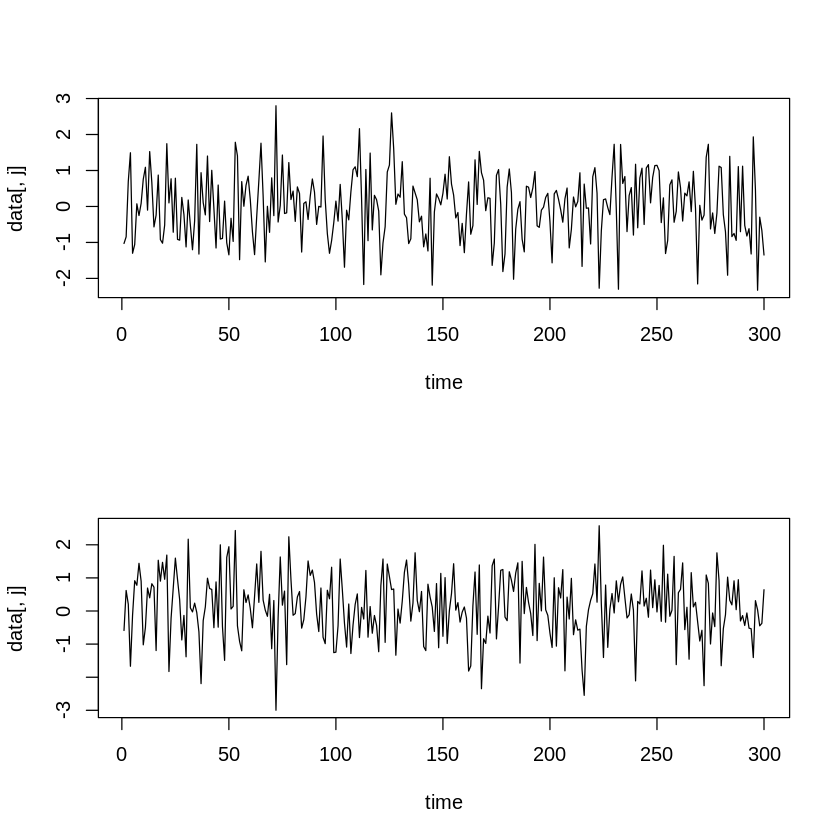

Hit Enter for p-value plot of individual ccm:  


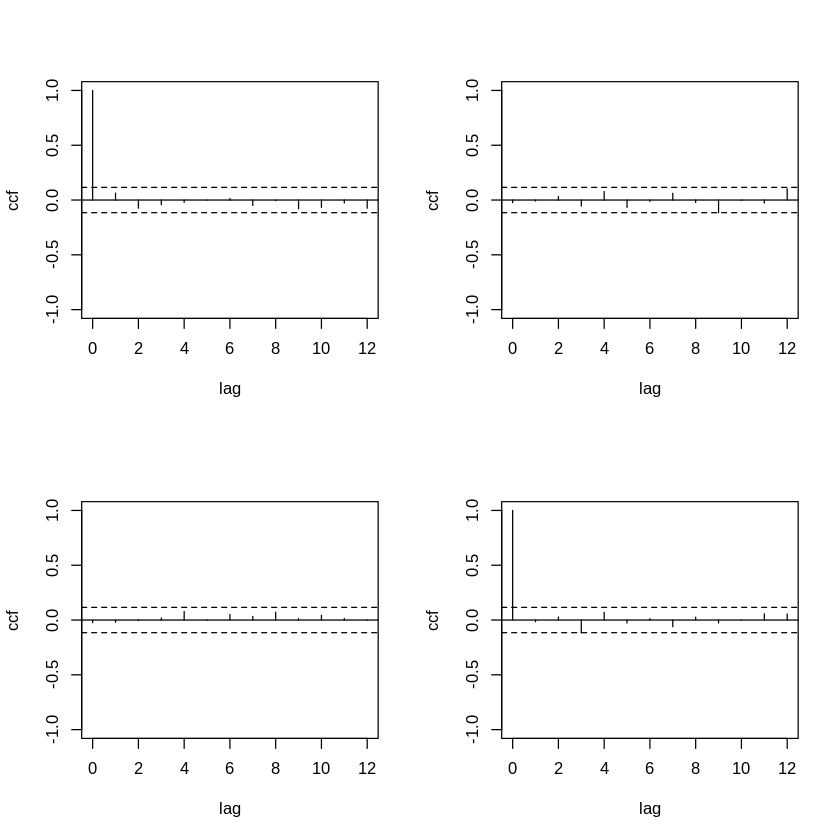

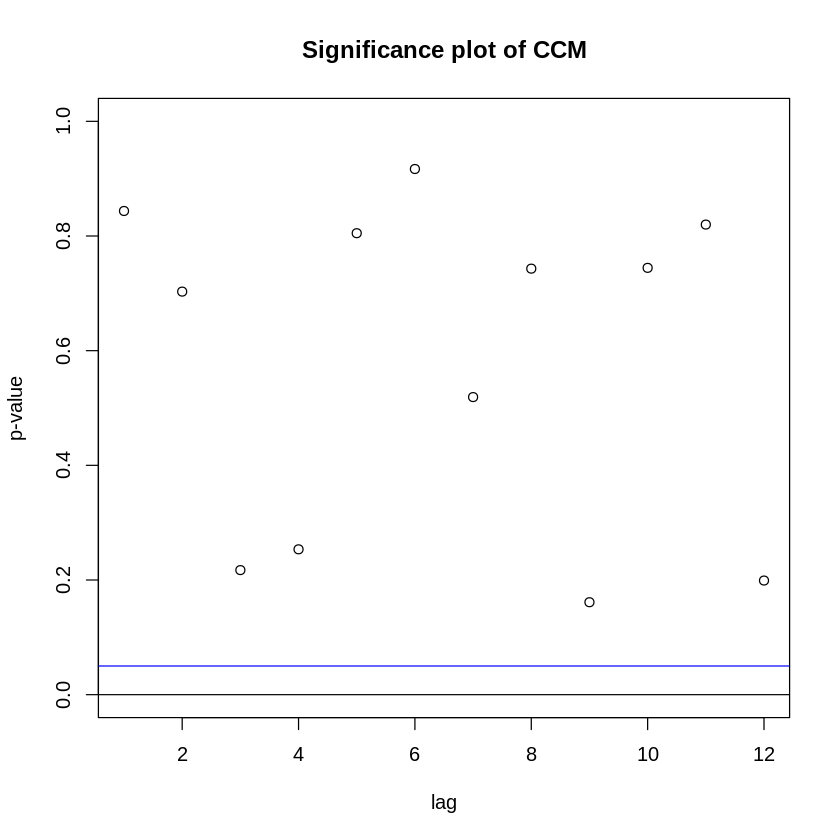

In [ ]:
##  Simulating a White Noise Process

sig=diag(2) # create the 2-by-2 identity matrix
x <- rmvnorm(300,rep(0,2),sig) # generate random draws

# Data Visualization
MTSplot(x) # Obtain time series plots

# CCM Estimation Outputs
ccm(x)

## Note: pres Enter key to generate the other outputs

### Testing For Zero Cross Correlations

To test $H_0: \mathbf{\rho}_i = \mathbf{0}_{k \times k}, i =1,2,..., m$, i.e., zero cross correlations from lags $1$ to $m$, versus the alternative  $H_1: ∃i, \mathbf{\rho}_i \ne \mathbf{0}_{k \times k}, i =1,2,..., m$ is the multivariate Ljung-Box test statistics:

$$Q_k (m) = T^2 \sum_{l=1}^m \frac{1}{T-l} tr \left( \hat{\mathbf{\Gamma}}'_l \hat{\mathbf{\Gamma}}_0^{-1} \hat{\mathbf{\Gamma}}_l \hat{\mathbf{\Gamma}}_0^{-1} \right)$$

Under the null hypothesis, $Q_k (m) \sim \chi^2_{(df = mk^2)}$

One can use the p-value

$$pval[Q_k (m)] = P \left[ X > Q_k (m) | X \sim \chi^2_{(df = mk^2)} \right] $$

to make a decision for each lag span $m$ an in the MTS package, a significance plot with horizontal reference line at $0.05$ is used for the multivariate Ljung-Box test.

Let's try an R demonstration using data from MTSA, available for students in UVLe, and a simulation.


,year,mon,gdp,rate
,<int>,<int>,<dbl>,<dbl>
1,1948,1,1821.809,3.733333
2,1948,4,1855.345,3.666667
3,1948,7,1865.320,3.766667
4,1948,10,1868.184,3.833333
5,1949,1,1842.240,4.666667
6,1949,4,1835.512,5.866667


33.536,-0.066666
9.975,0.100000
2.864,0.066666
-25.944,0.833334
-6.728,1.200000
20.591,0.833333


Ljung-Box Statistics:  
        m       Q(m)     df    p-value
 [1,]     1       140       4        0
 [2,]     2       196       8        0
 [3,]     3       213      12        0
 [4,]     4       232      16        0
 [5,]     5       241      20        0
 [6,]     6       246      24        0
 [7,]     7       250      28        0
 [8,]     8       261      32        0
 [9,]     9       281      36        0
[10,]    10       290      40        0


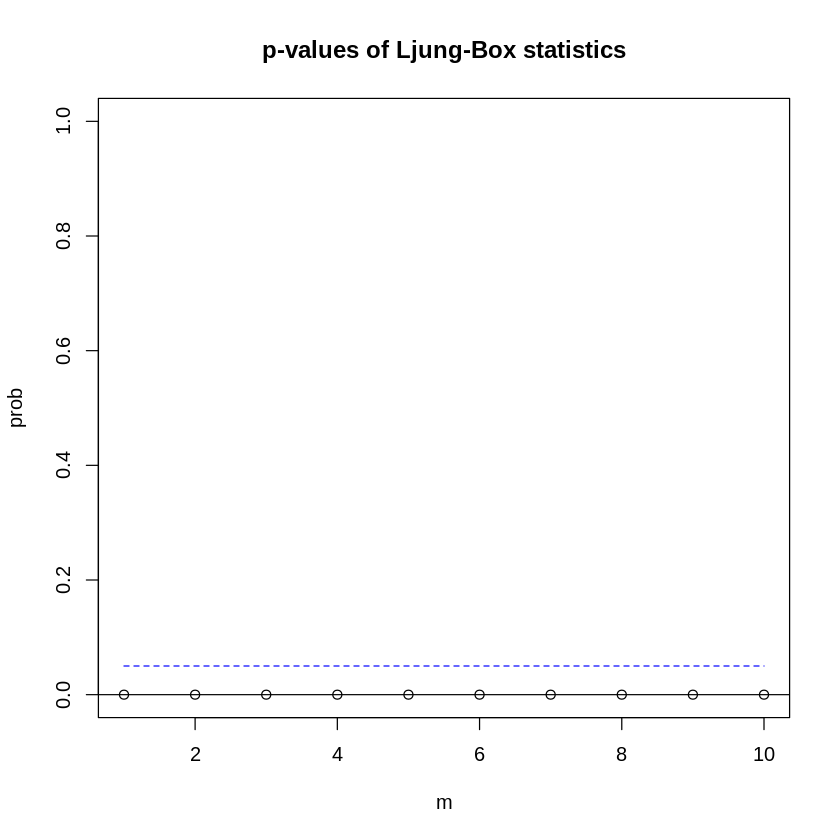

In [ ]:
### Demonstration for Multivariate Ljung-Box test using Real Data

da <- read.table("/content/q-gdpunemp.txt",header=T) ## Note: data available in UVLe

head(da) ## peak on the first few lines of data

x <- cbind(diff(da$gdp),diff(da$rate)) ## compute for the differenced series

head(x)

mq(x, lag = 10) ## Compute for the multivariate Ljung-Box test from lags 1 to 10

Ljung-Box Statistics:  
        m       Q(m)     df    p-value
 [1,]  1.00      9.41    9.00     0.40
 [2,]  2.00     16.04   18.00     0.59
 [3,]  3.00     28.85   27.00     0.37
 [4,]  4.00     42.23   36.00     0.22
 [5,]  5.00     46.25   45.00     0.42
 [6,]  6.00     53.69   54.00     0.49
 [7,]  7.00     61.63   63.00     0.53
 [8,]  8.00     64.28   72.00     0.73
 [9,]  9.00     71.83   81.00     0.76
[10,] 10.00     80.06   90.00     0.76


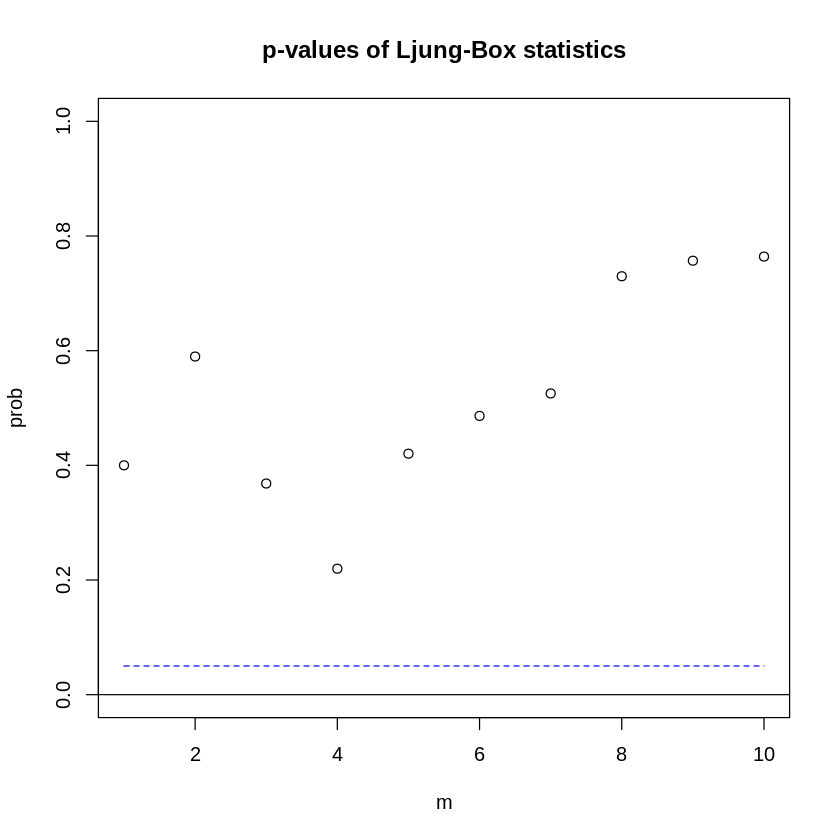

In [ ]:
### Demonstration for Multivariate Ljung-Box test using Simulated Data.

sig <- diag(3) ## Cov matrix = I_3x3
z=rmvnorm(200,rep(0,3),sig)
mq(z,10)

## Vector Autoregression Model

A multivariate time series $\mathbf{z}_t = [{z}_{1t},..., {z}_{kt}]'$ follows a vector autogression model of order $p$, denoted as $VAR(p)$, if (MTSA)

$$\mathbf{z}_t = \mathbf{c} + \sum_{i=1}^p \mathbf{\phi}_i \mathbf{z}_{t-i} + \mathbf{a}_t $$

where $\mathbf{c}$ is a constant vector, $\mathbf{\phi}_i \ne \mathbf{0}_{k \times k}$, and $\mathbf{a}_t \sim iid (\mathbf{0}_k, \mathbf{\Sigma}_a)$, with $\mathbf{\Sigma}_a$ being positive definite.



Comments:

* Alternatively, one can restate the model in terms of lag matrix polynomials, where $\mathbf{\phi}_p (B) = \mathbf{I}_k - \sum_{i=1}^p \mathbf{\phi}_i B^{i} $ and $\mathbf{\mu}_z = [\mathbf{I}_k - \sum_{i=1}^p \mathbf{\phi}_i]^{-1}\mathbf{c}  $:

$$\mathbf{\phi}_p (B) [\mathbf{z}_t - \mathbf{\mu}_z] = \mathbf{a}_t  $$

* For a $VAR(p)$ process to be stationary, the following condition for the matrix polynomial should be met, with $b$ being a scalar variable:

$$det \left[ \mathbf{I}_k - \sum_{i=1}^p \mathbf{\phi}_i b^{i} \right] \ne 0 \quad , \quad |b| \le 1 $$

* If the determinant polynomial above has a root at $b=1$, it means that at least one of the components of the vector $\mathbf{z}_t$ may have an integration order of 1, $I(1)$, which may imply a requirement for differencing or alternative models.

* In AICTSR, the specification used includes a provision for exogenous variables:

$$\mathbf{z}_t = \mathbf{BX}_t  + \sum_{i=1}^p \mathbf{\phi}_i \mathbf{z}_{t-i} + \mathbf{a}_t $$

* In the specification above, $\mathbf{B}$ is a $k \times r$ matrix of coefficients and $\mathbf{X}_t$ is an $r \times 1$ vector of exogenous variables for each time point $t$. A special case is $\mathbf{X}_t = 1$ which is a scalar and thus $\mathbf{B} = \mathbf{c}$.

* When we mean "exogenous variable", it means the variable affects some or all the variables in the vector but the vector variables do not affect the exogenous variable. It is "outside the system", thus, exogenous.

* Examples of exogenous variables are trend indices and seasonal indicators but some fields have other contexts on how exogeneity is determined.

* "Endogenous" means "within the system" in lay terms, so all the variables in the vector of interest are endogenous variables.



* One can extract the Wold moving average representation of a $VAR(p)$ process to extract the impulse response function $\mathbf{\psi}_i$, assuming $\mathbf{z}_t$ has zero mean vector:

$$\mathbf{\phi}_p (B) \mathbf{z}_t  = \mathbf{a}_t \Rightarrow  \mathbf{z}_t  = \mathbf{\phi}_p (B)^{-1} \mathbf{a}_t = \mathbf{\psi} (B) \mathbf{a}_t = \sum_{i =0}^{\infty} \mathbf{\psi}_i \mathbf{a}_{t-i} $$

* The algorithm for the solution to turn the $VAR(p)$ to a restricted $VMA(\infty)$ is:

\begin{align*}
& \mathbf{\psi}_0 = \mathbf{I}_k \quad , \quad \mathbf{\psi}_i =   \sum_{j =1}^{i} \mathbf{\psi}_{i-j} \mathbf{\phi}_j \quad , \quad i = 1, 2, ... \\
& {\phi}_j = \mathbf{0}_{k \times k} \quad , \quad j > p
\end{align*}

### Estimation of the VAR(p) Model

In the estimation of the

### Lag Selection Criteria for VAR Models

To facilita

### Residual Diagnostics

### Forecasting with VAR Models

### Inference for VAR Models

# References

(MTSA): Tsay RS (2014). Multivariate Time Series Analysis. Wiley.

(AICTSR): Pfaff B (2008). Analysis of Integrated and Cointegrated Time Series Analysis with R. Springer.